# Práctica 1 Introducción al Machine Learning. Perceptrones.


## Importación de bibliotecas. 

En primer lugar importamos las bibliotecas auxiliares necesarias.

In [1]:
# Importación de bibliotecas auxiliares
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

## Perceptrones monocapa


**Introducción**

Como se ha visto en teoría el perceptrón monocapa combina de forma lineal los valores del dato de entrada, les suma un "bias" y al resultado le aplica una función de activación no lineal. Esta función toma como valor +1 si el valor de entrada es positivo y -1 si el valor de entrada es negativo. La operación se muestra en la imagen siguiente:

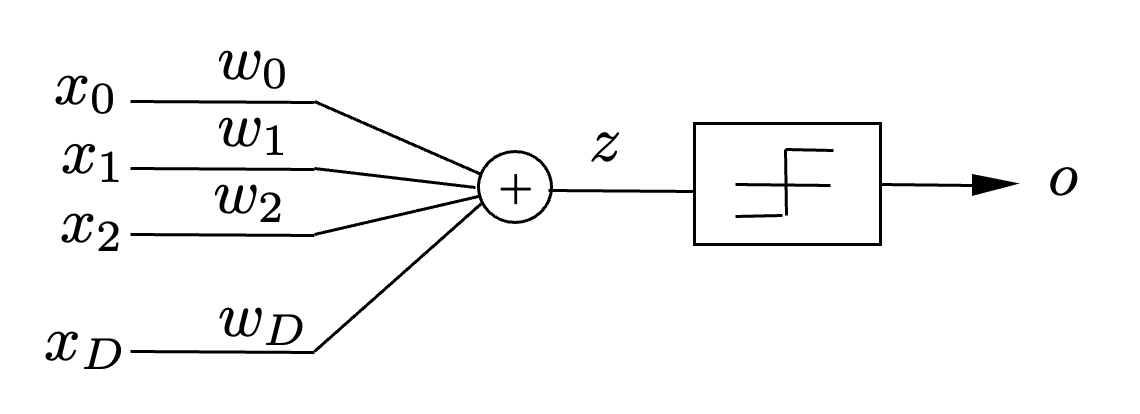

Los parámetros del perceptrópn son los pesos **w** y el *bias (b)*. La operación matemática es:

$$
\begin{equation*}
    z = \textbf{w}^T\textbf{x}  + b
\end{equation*}
$$


**Conjunto de datos**

En el problema de clasificación vamos a trabajar con el conocido conjunto de datos ("dataset") **Iris**: éste contiene medidas de longitud y ancho de pétalos y sépalos de flores de tres especies del género Iris. El conjunto de datos contiene 150 registros. Vamos a cargar todos los registros, pero para trabajar con el perceptrón monocapa vamos a emplear únicamente dos características de dos clases: la **longitud y anchura del pétalo** de los registros correspondientes a **versicolor** y **virginica**.


A continuación, cargamos los datos del conjunto de datos Iris como DataFrame para ver su estructura de forma clara. 

In [2]:
# Vamos a trabajar con la estructura de datos de Iris cuya descripción se muestra en: 
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

# Importación de los módulos necesarios de la biblioteca scikit learn
from sklearn import datasets

# Importamos el conjunto de datosc como un dataframe para ver la estructura 
caracteristicas,etiquetas = datasets.load_iris(return_X_y = True, as_frame = True)

print('Las características son:')
print(caracteristicas)
print('')
print('Las etiquetas son:')
print(etiquetas)

Las características son:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

Las etiquetas 

Seleccionamos el subconjunto de datos deseado.
Versicolor son las etiquetas ("targets") iguales a 1 y virginica las iguales a 2.

In [3]:
# Valores de versicolor y de virginica
clase_A = 1
clase_B = 2

# Valores de las etiquetas de correspondientes a la longitud y anchura del pétalo
caracteristicas = caracteristicas[['petal length (cm)', 'petal width (cm)']]
# Valores de las características de las clases deseadas
X = caracteristicas[ (etiquetas == clase_A) | (etiquetas == clase_B)]
X = X.values

# Valores de las etiquetas de las clases deseadas
y = etiquetas[ (etiquetas == clase_A) | (etiquetas == clase_B)]
y = y.values

Visualizamos las dos clases.

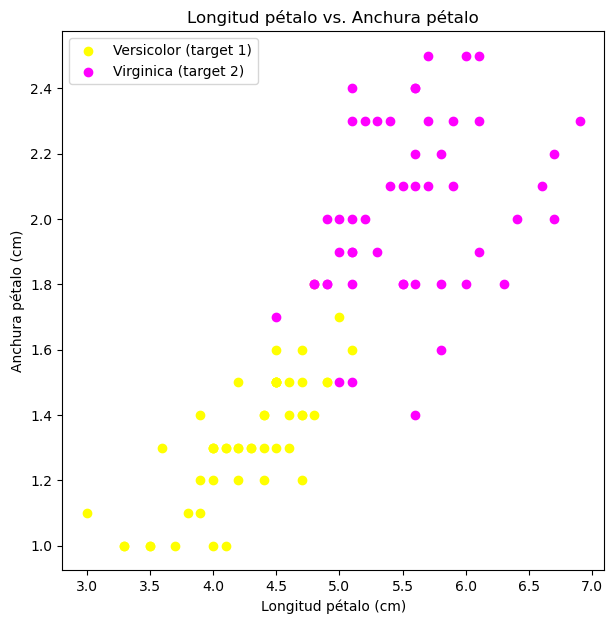

In [4]:
# Figura
fig, ax = plt.subplots(figsize = (7, 7))

condicion = y == clase_A
X_versicolor = X[condicion]
x1 = X_versicolor[:,0]
y1 = X_versicolor[:,1]
colores = 'yellow'
plt.scatter(x1, y1, color=colores, label='Versicolor (target 1)')

condicion = y == clase_B
X_virginica = X[condicion]
x1 = X_virginica[:,0]
y1 = X_virginica[:,1]
colores = 'magenta'
plt.scatter(x1, y1, color=colores, label='Virginica (target 2)')

plt.title("Longitud pétalo vs. Anchura pétalo")
plt.xlabel("Longitud pétalo (cm)")
plt.ylabel("Anchura pétalo (cm)")
plt.legend()

**Conjuntos de entrenamiento y test**

Ahora vamos a generar los conjuntos de entrenamiento y test: como sabemos el primero servirá para estimar los parámetros del modelo y el segundo para comprobar la capacidad de generalización. Seleccionamos un conjunto de test de tamaño igual al 20% del total.


In [5]:
# Importación del método train_test_split
from sklearn.model_selection import train_test_split

# Seleccionamos un 80% de los datos para entrenamiento y un 20% para test
X_ent, X_test, y_ent, y_test  = train_test_split(X, y, test_size=0.2)

**Estandarización de los datos**

Antes de entrenar el perceptrón se aplicará una fase de estandarización de los datos de entrada. La estandarización eliminará la media de cada característica y escalará para que la varianza sea la unidad. De este modo no existirán diferencias de escala en las características de entrada, esta operación mejora el rendimiento de los modelos de machine learning. Para realizar esta tarea emplearemos la clase `StandardScaler()` de Scikit-learn.

En primer lugar importamos la clase y la instanciamos.

In [6]:
# Importamos la clase StandardScaler para realizar el escalado
from sklearn.preprocessing import StandardScaler

# Instanciamos el escalador
scaler = StandardScaler()

Hay que calcular la estandarización con las características del conjunto de entrenamiento y aplicar la transformación generada al conjunto de entrenamiento y de test.

In [7]:
# Estandarización del conjunto de entrenamiento
X_ent_escaladas = scaler.fit_transform(X_ent)

# Aplicamos la estandarización calculada con los datos de entrenamiento a los datos de test
X_test_escaladas = scaler.transform(X_test)

**Entrenamiento**

El entrenamiento del perceptrón monocapa admite cambios en los hiperparámetros. Por ejemplo se puede fijar el número máximo de iteraciones de aplicación de la regla de entrenamiento del perceptrón. También se puede fijar la constante de actualización de los pesos de la combinación lineal. Vamos a utilizar los siguientes valores:

<font color='blue'> Número máximo de iteraciones </font>, `max_iter` igual a 500. El valor por defecto es 1000.

<font color='blue'>Constante de actualización de los pesos</font>, `eta0` igual a 0.1. El valor por defecto es 1.

En la siguiente celda importamos la clase `Perceptron` y generamos el modelo

In [8]:
# Importación de la clase Perceptron
from sklearn.linear_model import Perceptron

# Instanciamos la clase Perceptron
perceptron_monocapa = Perceptron(max_iter = 500, eta0 = 0.1)

# Entrenamos el perceptrón monocapa: para ello empleamos el método fit
perceptron_monocapa.fit(X_ent_escaladas, y_ent)

# Obtenemos las predicciones para el conjunto de entrenamiento y de test
y_sal_ent = perceptron_monocapa.predict(X_ent_escaladas)
y_sal_test = perceptron_monocapa.predict(X_test_escaladas)

La siguiente función será empleada para dibujar los datos de entrenamiento y de test y la frontera de decisión.

In [9]:
# Frontera de decisión: definimos una función para reutilizar el código
def dibuja_frontera_decision(Entradas, modelo, Salidas, clase_A, clase_B, 
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo_clase_A, simbolo_clase_B, tamano_simbolo, adicion_frontera):
    '''Dibuja las clases y la frontera de decisión generada por la 
    técnica de machine learning'''

    if (adicion_frontera == 1):
        minX1 = min(Entradas[:, 0])       # Valor mínimo de la 1ª característica
        maxX1 = max(Entradas[:, 0])       # Valor máximo de la 1ª característica
        minX2 = min(Entradas[:, 1])       # Valor mínimo de la 2ª característica
        maxX2 = max(Entradas[:, 1])       # Valor máximo de la 2ª característica
        marginX1 = (maxX1 - minX1) * 0.2  # 10% del rango
        marginX2 = (maxX2 - minX2) * 0.2  # para las dos características
        x1 = np.linspace(minX1 - marginX1, maxX1 + marginX1, 1000)  # Vector de coord. X1
        x2 = np.linspace(minX2 - marginX2, maxX2 + marginX2, 1000)  # Vector de coord. X2
        X1, X2 = np.meshgrid(x1, x2)       # Generamos las matrices de coordenadas

        # Concatenación con np.c_
        Z = modelo.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)

        
        plt.contourf(X1, X2, Z,levels = 2)

    condicion = Salidas == clase_A
    entradas_clase_A = Entradas[condicion]
    x1_A = entradas_clase_A[:,0]
    x2_A = entradas_clase_A[:,1]
    color_cero = colores[0] 
    plt.scatter(x1_A, x2_A, marker=simbolo_clase_A, s=tamano_simbolo, color=color_cero, label=etiqueta_leyenda_cero)

    condicion = Salidas == clase_B
    entradas_clase_B = Entradas[condicion]
    x1_B = entradas_clase_B[:,0]
    x2_B = entradas_clase_B[:,1]
    color_uno = colores[1]
    plt.scatter(x1_B, x2_B, marker=simbolo_clase_B, s=tamano_simbolo, color=color_uno, label=etiqueta_leyenda_uno)

    plt.title(titulo)
    plt.xlabel(titulo_eje_x)
    plt.ylabel(titulo_eje_y)
    plt.legend()

Ahora dibujamos los conjuntos de entrenamiento y de test y la frontera de decisión. Observe que la escala de las características ha cambiado respecto a la primera gráfica en la que se mostraban las dos clases.

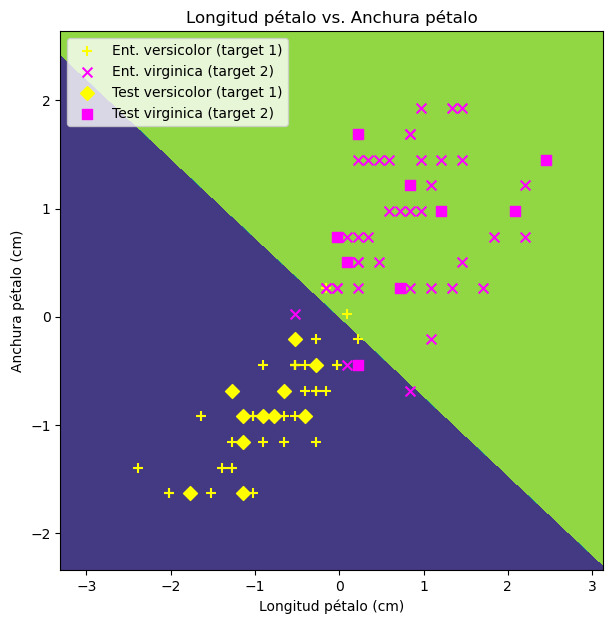

In [10]:
# Figura
fig, ax = plt.subplots(figsize = (7, 7))
# Valores de los parámetros de entrada
clase_A = 1
clase_B = 2
colores = ["yellow", "magenta"]
etiqueta_leyenda_cero = 'Ent. versicolor (target 1)'
etiqueta_leyenda_uno = 'Ent. virginica (target 2)'
titulo = "Longitud pétalo vs. Anchura pétalo"
titulo_eje_x = "Longitud pétalo (cm)"
titulo_eje_y = "Anchura pétalo (cm)"
simbolo_clase_A = '+'
simbolo_clase_B = 'x'
tamano_simbolo = 50
adicion_frontera = 1
# Dibujamos el resultados correspondiente a los datos de entrenamiento
dibuja_frontera_decision(X_ent_escaladas, perceptron_monocapa, y_ent, clase_A, clase_B,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo_clase_A, simbolo_clase_B, tamano_simbolo, adicion_frontera)

# Dibujamos el resultados correspondiente a los datos de entrenamiento
etiqueta_leyenda_cero = 'Test versicolor (target 1)'
etiqueta_leyenda_uno = 'Test virginica (target 2)'
simbolo_clase_A = 'D'
simbolo_clase_B = 's'
adicion_frontera = 0
dibuja_frontera_decision(X_test_escaladas, perceptron_monocapa, y_test, clase_A, clase_B,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo_clase_A, simbolo_clase_B, tamano_simbolo, adicion_frontera)

**Ejercicio 1: análisis de la precisión del perceptrón monocapa**

Obtenga la matriz de confusión y las métricas derivadas de la matriz de confusión del perceptrón monocapa tanto para el conjunto de entrenamiento como para el conjunto de test.

¿Es un clasificador preciso? Razone la respuesta.


## Perceptrones multicapa. Tareas de clasificación.

**Introducción**

El perceptrón multicapa es un tipo de red neuronal en la que existe una capa de entrada, una serie de capas ocultas y una capa de salida. La capa de entrada puede estar compuesta por varias entradas. Asimismo, la capa de salida puede estar compuesta por varias salidas. En la(s) capa(s) oculta(s) las neuronas devuelven el valor de una determinada función de activación para el valor de la entrada de la neurona. El esquema de un perceptrón multicapa de dos capas se muestra en la figura siguiente:

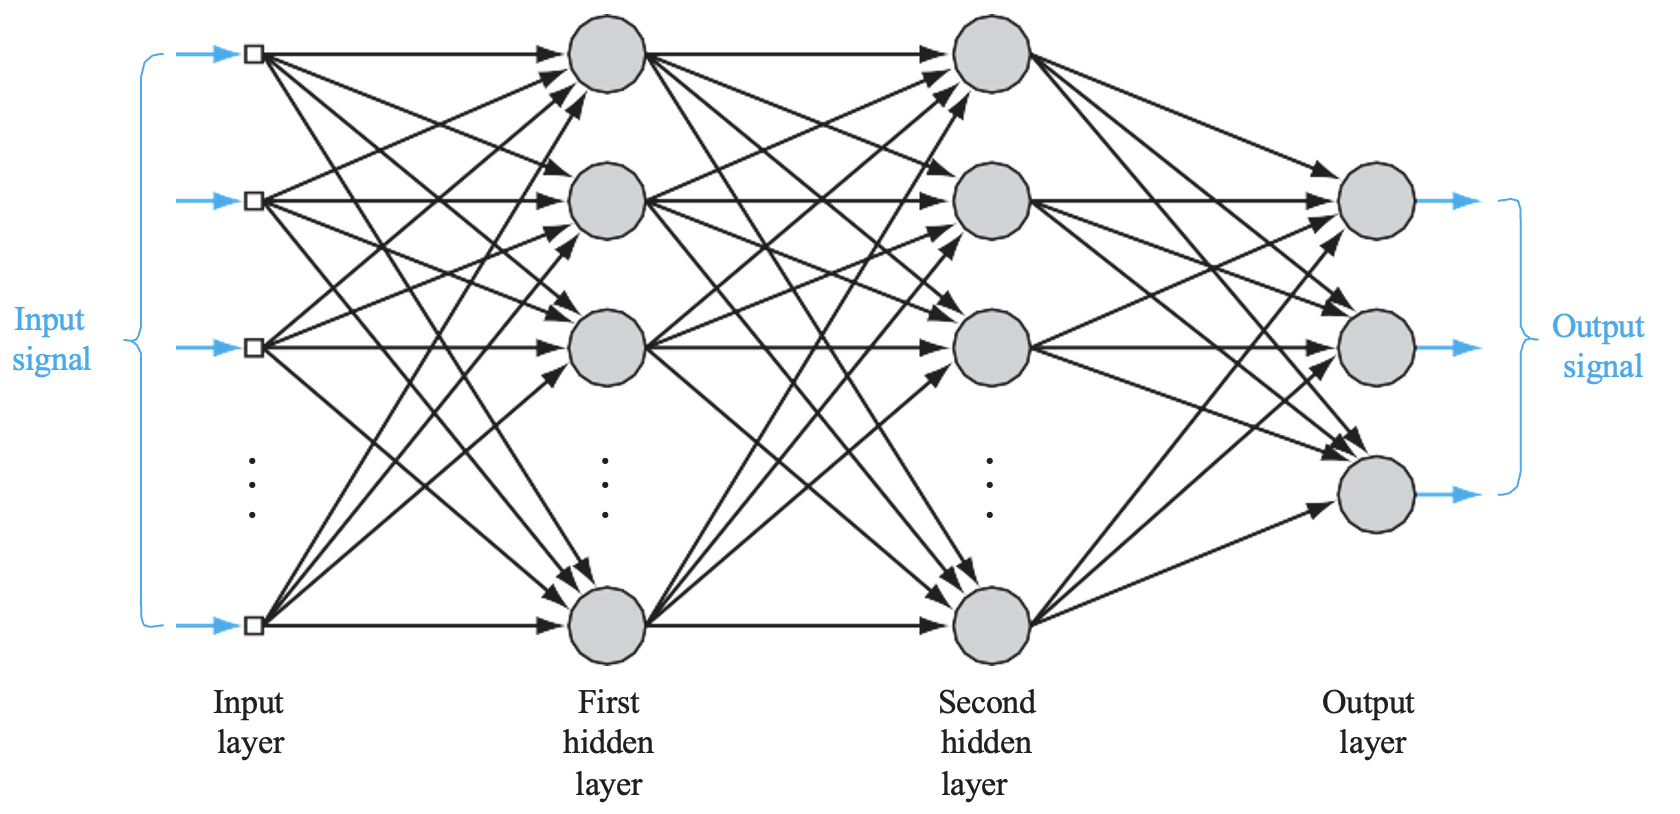

Los parámetros del perceptrópn son los pesos **w**  y el *bias (b)* que conectan las diferentes capas. La operación matemática para un perceptrón multicapa de dos capas es:

$$
\begin{equation}
    y_{k}=f \left( \sum_{j=1} w_{kj}^{(3)}  f \left(  \sum_{i=1} w_{ji}^{(2)} f \left(  \sum_{m=1} w_{im}^{(1)}x_{m}+ w_{m0}^{(1)} \right) + w_{i0}^{(2)} \right) + w_{k0}^{(3)} \right)
\end{equation}
$$


**Conjunto de datos**

En el entrenamiento y test de un perceptrón multicapa para tareas de clasificación vamos a emplear los mismos conjuntos empleados para el perceptrón monocapa en los apartados anteriores. Así podremos comparar los resultados obtenidos con el perceptrón monocapa y el multicapa en la tarea de clasificación.

**Construcción y entrenamiento del perceptrón multicapa**

El perceptrón multicapa va a tener la siguiente estructura y parámetros de entrenamiento: 

<font color='blue'> Número de capas ocultas </font>: es el parámetro `hidden_layer_sizes`. Su formato es una tupla (tuple) en el que el número de elementos marca el número de capas ocultas. El valor de cada elemento de la tupla es el número de neuronas de cada capa. Por ejemplo,  *hidden_layer_sizes=(20)* indica que hay una sola capa oculta con 20 neuronas, *hidden_layer_sizes=(20, 50)* indica que hay dos capas ocultas, la primera de ellas con 20 neuronas y la segunda con 50.

<font color='blue'> Función de activación </font>: es el parámetro `activation`. Puede tomar uno de los elementos del conjunto *{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}*. La función *‘identity’* simplemente devuelve x para f(x). La función *'relu'* es la función unidad rectificada lineal. La función *'logistic'* es la función logística y la función *'tanh'* es la tangente hiperbólica. El valor por defecto es *'relu'*.

El <font color='blue'> método para estimar los pesos </font>: es el parámetro `solver`. Puede tomar uno de los elementos del conjunto *{‘lbfgs’, ‘sgd’, ‘adam’}*. El método *‘lbfgs’* es una técnica de tipo quasi-Newton (algoritmo de memoria limitada Broyden–Fletcher–Goldfarb–Shanno). El método *‘sgd’* es el método de descenso por gradiente estocástico. El método *'adam'* es el Adam estocástico, es el método por defecto. Como indica la ayuda de *Scikit-learn* para conjuntos de datos de entrenamiento relativamente grandes grandes el método de Adam estocástico ofrece buenos resultados, en cambio para conjuntos pequeños el método *‘lbfgs’* converge antes y ofrece mejores resultados.

<font color='blue'> Número máximo de iteraciones </font>: es el parámetro `max_iter` y es el número máximo de iteraciones o epochs del método de entrenamiento. El valor por defecto es 200.

<font color='blue'> Ratio o tasa de aprendizaje </font> del método de entrenamiento: es el parámetro `learning_rate`. Es la tasa de cambio en los pesos del perceptrón multicapa. Puede tomar uno de los valores del conjunto *{‘constant’, ‘invscaling’, ‘adaptive’}*. El valor por defecto es *'constant'*. Este valor está fijado por otro parámetro llamado *learning_rate_init* cuyo valor por defecto es 0.001. Si se selecciona *‘invscaling’* la tasa de aprendizaje decrece gradualmente y si se selecciona *'adaptive'* la tasa decrece si se cumplen ciertas condiciones.

A continuación vamos a entrenar y validar un perceptrón multicapa con una única capa oculta y 5 neuronas, una función de activación logística, el método de estimación de los pesos (método de entrenamiento) *‘lbfgs’*, un número máximo de iteraciones de 200 y un *learning_rate* de tipo ‘invscaling’.

In [11]:
# Importación de la clase MLPCassifier
from sklearn.neural_network import MLPClassifier

# Instanciamos la clase MLPClassifier y generamos el perceptrón multicapa
# con los valores de los parámetros deseados
perceptron_multicapa_clasificacion = MLPClassifier(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', max_iter=200, learning_rate='invscaling')

**Ejercicio 2: entrenamiento y test del perceptrón multicapa**

Entrene y testee el perceptrón multicapa: entrene el perceptrón, genere las predicciones para los conjuntos de entrenamiento y de test (emplee los conjuntos estandarizados).

Obtenga las métricas del perceptrón multicapa.

Dibuje los puntos de entrenamiento y de test y la frontera de decisión.

**Ejercicio 3: análisis de los resultados de las métricas y del rendimiento del perceptrón multicapa**

¿Cuál es el rendimiento del perceptrón multicapa? ¿Es capaz de diferenciar sin error las dos clases en el conjunto de entrenamiento y test? 

Repita varias veces el entrenamiento del perceptrón multicapa y su evaluación con el conjunto de test, sin generar nuevos conjuntos de entrenamiento y de test y sin cambiar la configuración del perceptrón. Como puede observar la frontera de decisión cambia en cada nuevo entrenamiento, por ello, también cambia el rendimiento del perceptrón. ¿Por qué cambia la frontera de decisión cada vez que entrenamos de nuevo el percetrón?

**Evaluación del rendimiento y selección de parámetros mediante validación cruzada**

Hemos visto que el entrenamiento del perceptrón multicapa produce diferentes fronteras de decisión y por tanto diferentes valores de precisión. Como hemos visto en la sesión de estudio y análisis de métricas, se puede evaluar el rendimiento del método de machine learning de una forma más completa mediante el empleo de la validación cruzada.


A continuación realizamos una operación de validación cruzada con 5 subconjuntos o folds.

In [12]:
# Importamos la clase cross_val_score para realizar la validación cruzada
from sklearn.model_selection import cross_val_score

# El número de subconjuntos (folds) y por tanto el número de veces que se ejecuta el entrenamiento
# El valor por defecto es 5
numero_subconjuntos = 5
# Como función de utilidad tomamos la exactitud total 
funcion_utilidad = "accuracy"

# El modelo es el perceptrón multicapa
# EL conjunto de datos de entrada que se a dividir en diferentes subconjuntos (folds)
acierto = cross_val_score(perceptron_multicapa_clasificacion, X_ent_escaladas, y_ent,
                         scoring=funcion_utilidad, cv=numero_subconjuntos)

Mostramos el acierto de cada subconjunto, la media y la desviación estándar.

In [13]:
# Mostramos los resultados
print("El acierto de cada subconjunto es:")
print(acierto)
# Media
decimales = 3
print("La media del acierto es:")
print(round(acierto.mean(),decimales))
# Desviación estándard 
print("La desviación estándar del acierto es:")
print(round(acierto.std(),decimales))

El acierto de cada subconjunto es:
[0.875  1.     0.9375 0.875  0.9375]
La media del acierto es:
0.925
La desviación estándar del acierto es:
0.047


**Estimación del mejor conjunto de hiperparámetros**

Hasta el momento hemos utilizado una configuración fija del perceptrón multicapa para evaluar su rendimiento. Ahora bien, dicha configuración puede ser cambiada de modo que unas configuraciones pueden ofrecer un mejor rendimiento que otras. Por ejemplo, hemos empleado un perceptrón multicapa de una única capa oculta, sin embargo, una estructura con más de una capa oculta podría ofrecer mejores resultados. Asimismo, otros hiperparámetros como el número de neuronas por capa, el propio método de entrenamiento y sus parámetros pueden ser variados para buscar una configuración mejor.  

Tal como hicimos en las sesiones anteriores vamos a emplear `GridSearchCV` para seleccionar los hiperparámetros.

Así, vamos a estimar la precisión para un perceptrón multicapa de una única capa oculta con 10, 20 y 30 neuronas, con una función de activación de tres posibles tipos, logístico, tangente hiperbólica y relu y con dos métodos de entrenamiento, *'lbfgs'* y *'adam'*.

El número de combinaciones será por tanto: 3 x 3 x 2= 18.

Vamos a tomar número de subconjuntos o *folds* igual a 5 como en el ejemplo de validación cruzada. 


Vamos a emplear la clase `Pipeline()` de *Scikit-learn* para que la estandarización sólo se calcule con los datos de entrenamiento en cada iteración del algoritmo. Esta clase permite aplicar varias operaciones de forma secuencial a los datos. A continuación, importamos `GridSearchCV()` y `Pipeline` y definimos las operaciones del "pipeline".

In [14]:
# Importamons la biblioteca para generar todas las combinaciones de parámetros de entrenamiento
from sklearn.model_selection import GridSearchCV

# Importamos la clase Pipeline para poder escalar cuando se emplea cross_val_score
from sklearn.pipeline import Pipeline

# Generamos el pipeline adecuado: emplea un estimador que es el perceptrón multicapa
pipeline = Pipeline([ ('transformador', scaler), ('MLP_CL', MLPClassifier())])

Ahora definimos la rejilla de parámetros, los parámetros de `GridSearchCV()` y creamos la variable para aplicar la operación de "grid". Observe que el modelo empleado es "pipeline" que incluye la estandarización y al perceptrón multicapa de clasificación.

In [15]:
# Los valores de los hiperparámetros se guardan en un diccionario o en una lista de diccionarios
rejilla_hiperparametros = {
                            'MLP_CL__hidden_layer_sizes': [10, 20, 30], 
                            'MLP_CL__activation': ['logistic', 'tanh', 'relu'], 
                            'MLP_CL__solver': ['lbfgs', 'adam']
                            }

# Número de folds para la validación cruzada
numero_subconjuntos = 5
# Función utilidad
funcion_utilidad = "accuracy"


# Se crean todas las configuraciones del perceptrón multicapa
grid_search = GridSearchCV(pipeline, rejilla_hiperparametros, cv=numero_subconjuntos,
                           scoring=funcion_utilidad, return_train_score=True)

Aplicamos el método de `gridsearchCV` para obtener la mejor configuración de entre las analizadas. Como la operación de estandarización se realiza durante la operación de "grid", las características se utilizan sin estandarizar.  

In [16]:
# Entrenamiento y validación de todas las configuraciones
# Empleamos el conjunto de datos de entrenamiento
grid_search.fit(X_ent, y_ent)

# GridSearchCV devuelve un diccionario
resultados = grid_search.cv_results_
# Transformamos en un DataFrame para visualizar de forma más sencilla los resultados
resultados_dataframe = pd.DataFrame.from_dict(resultados)
# La mejor configuración es:
print(resultados_dataframe)

c:\Users\fcoja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fcoja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fcoja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fcoja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fcoja\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.043490      0.013969         0.001121        0.000200   
1        0.122830      0.018349         0.001755        0.000624   
2        0.034893      0.023572         0.000838        0.000424   
3        0.060603      0.012465         0.000875        0.000443   
4        0.058115      0.029045         0.001804        0.000477   
5        0.133080      0.013059         0.001208        0.000402   
6        0.061763      0.014644         0.001272        0.000427   
7        0.137926      0.012588         0.001648        0.000754   
8        0.039522      0.006089         0.001668        0.000574   
9        0.133789      0.007718         0.001977        0.000806   
10       0.064853      0.024654         0.002284        0.001004   
11       0.121986      0.033318         0.001422        0.000789   
12       0.052770      0.026468         0.001412        0.000550   
13       0.108548      0.041220         0.001428

c:\Users\fcoja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Ejercicio 4: obtención de la mejor configuración**

Obtenga la mejor configuración y el acierto de la mejor configuración (`grid_search.best_score_`).

## Perceptrones multicapa. Tareas de regresión.

**Introducción**

Como se ha visto en teoría el perceptrón multicapa se puede emplear en tareas tanto de clasificación como de regresión. En los siguientes ejercicios vamos a analizar el rendimiento de un perceptrón multicapa en una tarea de regresión.

**Base de datos del problema de regresión**

La base de datos se encuentra en la plataforma de machine learning OpenML y contiene datos del precio y demanda de electricidad en dos estados australianos. La información del conjunto de datos se puede consultar en el siguiente enlace:

https://www.openml.org/search?type=data&sort=runs&status=active&id=151

Vamos a importar los datos mediante la función de Scikit-learn `fetch_openml`. Mostraremos una descripción de los datos

In [17]:
from sklearn.datasets import fetch_openml

# Información sobre fetch_openml
# https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml

electricidad = fetch_openml(name='electricity', version=1, as_frame=True)

# En el atributo DESCR de la variable que devuelve fetch_openml 
# se muestra la descripción del conjunto de datos
print(electricidad.DESCR)

# Los datos se encuentran en el atributo data
# Las cabeceras de los datos se muestran a continuación. 
print(electricidad.data.head(3))

# Generamos el dataframe de datos
electricidad_dataframe = electricidad.frame

electricidad_dataframe

c:\Users\fcoja\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: M. Harries, J. Gama, A. Bifet  
**Source**: [Joao Gama](http://www.inescporto.pt/~jgama/ales/ales_5.html) - 2009  
**Please cite**: None  

**Electricity** is a widely used dataset described by M. Harries and analyzed by J. Gama (see papers below). This data was collected from the Australian New South Wales Electricity Market. In this market, prices are not fixed and are affected by demand and supply of the market. They are set every five minutes. Electricity transfers to/from the neighboring state of Victoria were done to alleviate fluctuations.

The dataset (originally named ELEC2) contains 45,312 instances dated from 7 May 1996 to 5 December 1998. Each example of the dataset refers to a period of 30 minutes, i.e. there are 48 instances for each time period of one day. Each example on the dataset has 5 fields, the day of week, the time stamp, the New South Wales electricity demand, the Victoria electricity demand, the scheduled electricity transfer between states and the 

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN
...,...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,DOWN
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,DOWN
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP


**Si no ha podido descargar la base de datos con `fetch_openml`, puede descargarla con el siguiente csv.**

In [33]:
electricidad_dataframe = pd.read_csv('Electricidad.csv', sep=',')

La base de datos muestra la demanda y precio de la electricidad durante varias semanas en intervalos de media hora. Por lo tanto, cada día contiene 48 muestras que se encuentran normalizadas entre 0 y 1. 

También existen otras variables como la transferencia de electricidad entre estados. Vamos a considerar únicamente dos variables: los periodos de tiempo correspondientes a dos días consecutivos y la demanda de electricidad.

In [31]:
# Seleccionamos el periodo y la demanda. 
# La variable x es el periodo y la variable y la demanda
caracteristica_seleccionada = "period"
# Antes
#X_reg_ini = electricidad.data[caracteristica_seleccionada]
#y_reg_ini = electricidad.data["nswdemand"]
X_reg_ini = electricidad_dataframe[caracteristica_seleccionada]
y_reg_ini = electricidad_dataframe["nswdemand"]

# Se seleccionan los datos de dos días. 
num_dias = 2
num_datos_dia = 48

# La variable dia_ini indica que el primer día será el siguiente al cuarto, es decir,
# el viernes. Por tanto, seleccionamos los datos del primer viernes y el primer sábado
dia_ini = 4
ini = num_datos_dia*dia_ini
fin = ini+num_dias*num_datos_dia

rango = np.arange(ini, fin, 1)
X_reg_ini = X_reg_ini[rango]
y_reg_ini = y_reg_ini[rango]

lista = list(range(0, num_dias))
for indice in range(num_dias):
    rango_bucle = rango[0+indice*num_datos_dia:num_datos_dia*(indice+1)-1]
    X_reg_ini[rango_bucle] = X_reg_ini[rango_bucle] + lista[indice]

A continuación dibujamos los datos seleccionados

Text(0, 0.5, 'Demanda eléctrica')

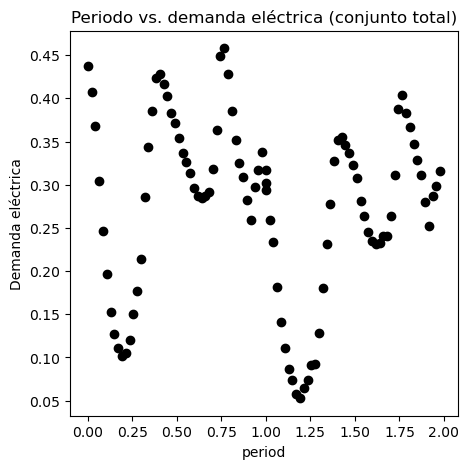

In [32]:
# Figura
# Mostramos los datos del conjunto de los dos días
fig, ax = plt.subplots(figsize = (5, 5))
plt.scatter(X_reg_ini, y_reg_ini, color='black', marker='o')
titulo = "Periodo vs. demanda eléctrica (conjunto total)"
titulo_eje_x = caracteristica_seleccionada
titulo_eje_y = "Demanda eléctrica"
plt.title(titulo)
plt.xlabel(titulo_eje_x)
plt.ylabel(titulo_eje_y)

Extraemos los datos y transformamos al formato correcto.

In [23]:
# X_reg e y_reg son Series de pandas, extraemos los datos y transformamos al formato correcto
X_reg = X_reg_ini.values
X_reg = X_reg.reshape(-1, 1)
y_reg = y_reg_ini.values

Generamos los conjuntos de entrenamiento y de test. Asignamos un 20% de ejemplos al conjunto de test.

In [24]:
# Generamos los conjuntos de entrenamiento y test
# El conjunto de test es un 20% de las muestras
X_reg_ent, X_reg_test, y_reg_ent, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.20)

Al igual que en el caso de clasificación, vamos a estandarizar los datos para conseguir un rendimiento mejor. En el código de la siguiente celda se aplica el escalado proporcionado por la clase `StandardScaler()`. La estandarización se calcula con los datos de entrenamiento y se aplica a los datos de entrenamiento y de test.

In [25]:
# Estandarización del conjunto de entrenamiento
X_reg_ent_escaladas = scaler.fit_transform(X_reg_ent)

# Aplicamos la estandarización calculada con los datos de entrenamiento a los datos de test
X_reg_test_escaladas = scaler.transform(X_reg_test)

Importamos la clase `MLPRegressor`, regresor o aproximador de tipo perceptrón de *Scikit-learn*.

In [26]:
# Importamos la clase MLPRegressor
from sklearn.neural_network import MLPRegressor

Construimos el regresor.

Está formado por una única capa, 5 neuronas, una función de activación de tipo *relu*, un método para hallar los pesos de tipo *lbfgs*, un número máximo de iteraciones de 500 y una ratio de aprendizaje de tipo *invscaling*.

In [27]:
# Instancia del MLP regresor
perceptron_multicapa_reg = MLPRegressor(hidden_layer_sizes=(5), 
                                    activation='relu', solver='lbfgs', max_iter=500,
                                    learning_rate='invscaling')

Entrenamos y generamos las predicciones del conjunto de entrenamiento y de test, necesarias para la función que dibuja los puntos.

In [28]:
# Entrenamos el perceptrón multicapa
perceptron_multicapa_reg.fit(X_reg_ent_escaladas, y_reg_ent)

y_reg_sal_ent = perceptron_multicapa_reg.predict(X_reg_ent_escaladas)
y_reg_sal_test = perceptron_multicapa_reg.predict(X_reg_test_escaladas)

En la siguiente celda de código se muestra la función para obtener la gráfica con los puntos y las predicciones.

In [29]:
# Programamos una función para dibujar conjuntos de puntos y que 
# opcionalmente puede dibujar la curva que genera el MLP
def dibuja_puntos(Entradas, modelo, Salidas_verdaderas, Salidas_predichas, 
                  colores, etiqueta_verdadera, etiqueta_prediccion, 
                  simbolo, tamano_simbolo, titulo, titulo_eje_x, titulo_eje_y, dibuja_curva):
    ''' Dibuja los puntos originales y las salidas generadas por el modelo de 
    machine learning '''

    color_verdaderas = colores[0]
    plt.scatter(Entradas, Salidas_verdaderas, marker=simbolo, s=tamano_simbolo, 
                color=color_verdaderas, label=etiqueta_verdadera)

    color_prediccion = colores[1]
    plt.scatter(Entradas, Salidas_predichas, marker=simbolo, 
                s=tamano_simbolo, color=color_prediccion, label=etiqueta_prediccion)

    if (dibuja_curva == 1):

        minX = min(Entradas)       # Valor mínimo del eje x
        maxX = max(Entradas)       # Valor máximo del eje y
        marginX = (maxX - minX) * 0.0  # 5 % del rango
        # Valores del eje x para dibujar la curva
        Entradas_linea = np.linspace(minX-marginX, maxX+marginX, 200)
        Salidas_linea = modelo.predict(Entradas_linea)

        plt.plot(Entradas_linea, Salidas_linea, color='green', label='Curva generada')

    plt.title(titulo)
    plt.xlabel(titulo_eje_x)
    plt.ylabel(titulo_eje_y)
    plt.legend()

Dibujamos los resultados. Se muestra lo siguiente:

+ Los datos del conjunto de entrenamiento con círculos azules.
+ Las predicciones del conjunto de entrenamiento con círculos magenta.
+ La curva que genera el modelo con una línea continua en color verde.
+ Los datos del conjunto de test con diamantes negros.
+ Las predicciones del conjunto de test con diamantes verde.

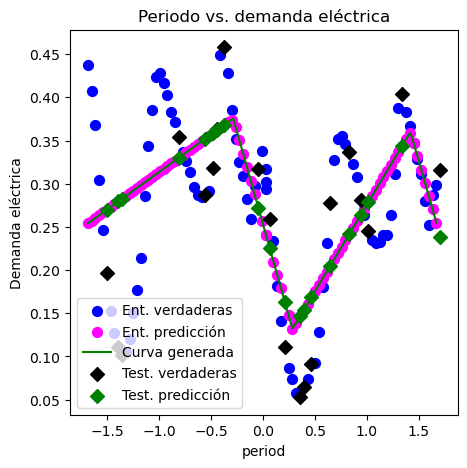

In [30]:
# Figura
fig, ax = plt.subplots(figsize = (5, 5))

colores = ["blue", "magenta"]
etiqueta_verdadera = 'Ent. verdaderas'
etiqueta_prediccion = 'Ent. predicción'
titulo = "Periodo vs. demanda eléctrica"
titulo_eje_x = caracteristica_seleccionada
titulo_eje_y = "Demanda eléctrica"
simbolo = 'o'
tamano_simbolo = 50
dibuja_curva = 1
dibuja_puntos(X_reg_ent_escaladas, perceptron_multicapa_reg, y_reg_ent, y_reg_sal_ent, 
                  colores, etiqueta_verdadera, etiqueta_prediccion, 
                  simbolo, tamano_simbolo, titulo, titulo_eje_x, titulo_eje_y, dibuja_curva)


colores = ["black", "green"]
etiqueta_verdadera = 'Test. verdaderas'
etiqueta_prediccion = 'Test. predicción'
simbolo = 'D'
tamano_simbolo = 50
dibuja_curva = 0
dibuja_puntos(X_reg_test_escaladas, perceptron_multicapa_reg, y_reg_test, y_reg_sal_test, 
                  colores, etiqueta_verdadera, etiqueta_prediccion, 
                  simbolo, tamano_simbolo, titulo, titulo_eje_x, titulo_eje_y, dibuja_curva)

**Ejercicio 5: Análisis del rendimiento del perceptrón multicapa con la primera configuración**

En la figura anterior se puede observar el rendimiento del perceptrón multicapa, vamos a emplear el error cuadrático medio y el valor absoluto medio. Programe el código necesario para hallar las métricas para el conjunto de entrenamiento y de test. 

A la vista de la gráfica de resultados:
¿Es un buen aproximador? ¿Existe un problema de subjuste? ¿Existe un problema de sobreajuste? Razone las respuestas.

**Ejercicio 6: análisis del rendimiento cuando se aumenta la complejidad del perceptrón multicapa**

Vamos a aumentar el número de neuronas para tratar de mejorar el rendimiento del perceptrón multicapa. Aumente el número de capas ocultas a 2 y el número de neuronas en cada capa oculta a 30 (*'hidden_layer_sizes=(30, 30)'*) y un número máximo de iteraciones igual a 2000, no cambie el resto de parámetros, emplee los mismos conjuntos de entrenamiento y test que en el caso de la red con 5 neuronas. 

Obtenga la gráfica que dibuja todos los puntos, los de entrenamiento y test y las salidas de la red neuronal y la curva que genera. Obtenga el error cuadrático medio del conjunto de entrenamiento y de test. 

¿Hay un problema de subajuste? ¿Hay un problema de sobreajuste? Razone las respuestas.


**Ejercicio 7: estimación del mejor conjunto de hiperparámetros en el perceptrón multicapa para tareas de regresión**

Vamos a utilizar *'GridSeacrhCV'* para estimar la mejor configuración de entre un conjunto de posibles configuraciones dada una serie de hiperparámetros.

Vamos a estimar la precisión para un perceptrón multicapa con las siguientes estruturas:
- Dos y tres capas ocultas y 10 neuronas en cada capa.
- Dos y tres capas ocultas y 20 neuronas en cada capa.
- Dos y tres capas ocultas y 30 neuronas en cada capa.
- Dos y tres capas ocultas y 40 neuronas en cada capa.
- Dos y tres capas ocultas y 50 neuronas en cada capa.
- Dos y tres capas ocultas y 60 neuronas en cada capa.

Una función de activación de tres posibles tipos: logístico, tangente hiperbólica y relu y con un único método de entrenamiento, *'lbfgs'* y un número máximo de iteraciones de 2000.

Como función de utilidad utilizaremos el valor negativo del error cuadrático medio `neg_mean_squared_error`.

Recuerde en emplear `Pipeline` para aplicar la estandarización y el perceptrón multicapa de regresión.

Obtenga la mejor configuración y su acierto.
